In [1]:
import pandas as pd
import numpy as np

In [2]:
ppt = pd.read_csv('../FinalDatasets/ppt.csv')
maxt = pd.read_csv('../FinalDatasets/MaxT.csv')
mint = pd.read_csv('../FinalDatasets/MinT.csv')
esals =pd.read_csv('../FinalDatasets/ESALs.csv')
rdat = pd.read_csv('../FinalDatasets/RoughnessCrackingDataset.csv')

In [3]:
#Rehabilitation years
Ryrs = rdat[['UID', 'Major Rehab Year', 'Prior Major Rehab Year']]
Ryrs.columns = ['UID', 'MRYear', 'PMRYear']
Ryrs = Ryrs.drop_duplicates(subset = 'UID')
Ryrs.index = Ryrs.UID

In [4]:
import math
def removeNan(row):
    val = row['PMRYear']
    if math.isnan(val):
        return 1900
    return val

In [5]:
Ryrs.loc[:, 'PriorRehab'] = Ryrs.apply(removeNan, axis = 1)

In [6]:
Ryrs[Ryrs.PriorRehab==1900].head()

,UID,MRYear,PMRYear,PriorRehab
UID,,,,
399,399,2003,NaN,1900
443,443,2008,NaN,1900
1047,1047,2008,NaN,1900
401,401,2003,NaN,1900
1,1,1994,NaN,1900


In [7]:
print len(np.unique(np.array(esals.ID)))*33

316305


In [8]:
selected_ids = np.unique(np.array(ppt.ID))
esals = esals[esals.ID.isin(selected_ids)]

In [9]:
esals = esals.drop_duplicates(subset = ['ID'])
ppt  = ppt.drop_duplicates(subset = ['ID'])
mint = mint.drop_duplicates(subset = ['ID'])
maxt = maxt.drop_duplicates(subset = ['ID'])

In [10]:
print len(esals)
print len(ppt)
print len(mint)
print len(maxt)
print len(Ryrs)

8938
8938
8938
8938
8938


In [11]:
def addPrevRehabYear(row):
    ix = row['ID'] #index
    return Ryrs.loc[ix, 'PriorRehab']

def addRehabYear(row):
    ix = row['ID'] #index
    return Ryrs.loc[ix, 'MRYear']

In [12]:
def addRehabYears(df):
    df.loc[:, 'PriorMRyr'] = df.apply(addPrevRehabYear, axis =1)
    df.loc[:, 'MajorRyr'] = df.apply(addRehabYear, axis =1)

In [13]:
addRehabYears(esals)
addRehabYears(ppt)
addRehabYears(mint)
addRehabYears(maxt)

In [14]:
esals.head()

,Unnamed: 0,ID,Year,1981,1982,1983,1984,1985,1986,1987,...,2006,2007,2008,2009,2010,2011,2012,2013,PriorMRyr,MajorRyr
0,0,1,1981,12895.622638,13058.226161,13828.983957,14994.900067,15576.625091,16534.948341,17254.391382,...,28771.148850,28826.453915,27905.473334,28384.511776,28596.103563,28398.052581,28200.120262,30058,1900,1994
33,33,24,1981,74655.435707,75596.781245,80058.858085,86808.588411,90176.315303,95724.247479,99889.252548,...,166562.151628,166882.324128,161550.576411,164323.829367,165548.778134,164402.219899,163256.348627,174012,1975,2002
66,66,27,1981,45866.166245,46444.502042,49185.874538,53332.715961,55401.751123,58810.242107,61369.102197,...,102331.026057,102527.730891,99252.057462,100955.864825,101708.438342,101004.025728,100300.035164,106908,1994,2002
99,99,28,1981,45866.166245,46444.502042,49185.874538,53332.715961,55401.751123,58810.242107,61369.102197,...,102331.026057,102527.730891,99252.057462,100955.864825,101708.438342,101004.025728,100300.035164,106908,1994,2002
132,132,32,1981,49971.074003,50601.169416,53587.887929,58105.861341,60360.070002,64073.612448,66861.484150,...,111489.398277,111703.707705,108134.869653,109991.163537,110811.090510,110043.634720,109276.638753,116476,1988,2002


In [22]:
ppt.head()

,Unnamed: 0,ID,Year,1981,1982,1983,1984,1985,1986,1987,...,2006,2007,2008,2009,2010,2011,2012,2013,PriorMRyr,MajorRyr
0,0,1,1981,1066.829956,162.889999,1120.599976,1122.50000,717.570007,979.989990,797.580017,...,1123.930054,986.440002,907.669983,886.520020,1081.599976,1063.219971,1368.500000,841.650024,1900,1994
33,33,24,1981,1116.060059,170.139999,1182.339966,1191.01001,757.960022,1039.619995,826.580017,...,1199.829956,1059.880005,986.460022,962.859985,1121.319946,1131.180054,1424.569946,906.809998,1975,2002
66,66,27,1981,1116.060059,170.139999,1182.339966,1191.01001,757.960022,1039.619995,826.580017,...,1199.829956,1059.880005,986.460022,962.859985,1121.319946,1131.180054,1424.569946,906.809998,1994,2002
99,99,28,1981,1116.060059,170.139999,1182.339966,1191.01001,757.960022,1039.619995,826.580017,...,1199.829956,1059.880005,986.460022,962.859985,1121.319946,1131.180054,1424.569946,906.809998,1994,2002
132,132,32,1981,1116.060059,170.139999,1182.339966,1191.01001,757.960022,1039.619995,826.580017,...,1199.829956,1059.880005,986.460022,962.859985,1121.319946,1131.180054,1424.569946,906.809998,1988,2002


In [15]:
def cumVal(row):
    ix = row['ID']
    syear = row['Year']
    l = np.array(row[['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', 
                      '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                     '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
                     '2011', '2012', '2013']])
    pmr = int(row['PriorMRyr'])
    if pmr > 1981:
        p1 = pmr - 1981
    else:
        p1 =0
    mr  = int(row['MajorRyr'])
    if (mr > 1981) & (mr < 2014):
        p2 = mr - 1981
    else:
        p2 =0
        
    if (p1 ==0) & (p2==0):
        res = list(np.cumsum(l))
        
    elif p1 == 0:
        l1 = list(np.cumsum(l[0:p2]))
        l2 = list(np.cumsum(l[p2:]))
        res = l1 + l2
    else:
        l1 = list(np.cumsum(l[0:p1]))
        l2 = list(np.cumsum(l[p1:p2]))
        l3 = list(np.cumsum(l[p2:]))
        res = l1 + l2 + l3
        
    return ix, syear, res

In [16]:
distributeResultToColumns = lambda x: pd.Series(([i for i in x[:2]] + [j for j in x[2:][0]]))
colNames = esals.columns[1:-2]
def getCumVarDataset(df):
    rdf = df.apply(cumVal, axis = 1)
    rdf = pd.DataFrame(rdf)
    rdf.columns = ['Results']
    newdf = rdf['Results'].apply(distributeResultToColumns)
    output = newdf[range(35)]
    output.columns = colNames
    return output

In [17]:
def cmean(row): #function determines the cumulative variables in a row
    ix = row['ID']
    syear = row['Year']
    l = np.array(row[['1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', 
                      '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
                     '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', 
                     '2011', '2012', '2013']])
    pmr = int(row['PriorMRyr'])
    if pmr > 1981:
        p1 = pmr - 1981
    else:
        p1 =0
    mr  = int(row['MajorRyr'])
    if (mr > 1981) & (mr < 2014):
        p2 = mr - 1981
    else:
        p2 =0
        
    if (p1 ==0) & (p2==0):
        r = np.cumsum(l)
        d = np.arange(len(r))+1
        res = list(r/d)
        
    elif p1 == 0:
        l1 = np.cumsum(l[0:p2])
        d1 = np.arange(len(l1))+1
        l2 = np.cumsum(l[p2:])
        d2 = np.arange(len(l2))+1
        meanl1 = l1/d1
        meanl2 = l2/d2
        res = list(meanl1) + list(meanl2)
    else:
        l1 = np.cumsum(l[0:p1])
        d1 = np.arange(len(l1))+1
        l2 = np.cumsum(l[p1:p2])
        d2 = np.arange(len(l2))+1
        l3 = np.cumsum(l[p2:])
        d3 = np.arange(len(l3))+1
        meanl1 = l1/d1
        meanl2 = l2/d2
        meanl3 = l3/d3
        res = list(meanl1) + list(meanl2) + list(meanl3)
        
    return ix, syear, res

In [18]:
distributeResultToColumns = lambda x: pd.Series(([i for i in x[:2]] + [j for j in x[2:][0]]))
colNames = esals.columns[1:-2]
def cmeanVarDataset(df):
    rdf = df.apply(cmean, axis = 1)
    rdf = pd.DataFrame(rdf)
    rdf.columns = ['Results']
    newdf = rdf['Results'].apply(distributeResultToColumns)
    output = newdf[range(35)]
    output.columns = colNames
    return output

In [19]:
cumPpt   = getCumVarDataset(ppt)
cumEsals = getCumVarDataset(esals)
meanMaxT = cmeanVarDataset(maxt)
meanMinT = cmeanVarDataset(mint)

In [20]:
meanMinT.head()

,ID,Year,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,1,1981,2.26,1.460,0.216667,0.0075,-0.182,0.105,0.167143,0.25625,...,1.078182,0.994167,0.938462,0.856429,0.768000,0.60875,0.741176,0.70,0.695263,0.626000
33,24,1981,1.96,1.235,0.013333,-0.2200,-0.440,-0.150,-0.081429,0.01375,...,1.333333,0.942500,0.782000,0.581667,0.398571,0.09250,0.371111,0.31,0.320000,0.216667
66,27,1981,1.96,1.235,0.013333,-0.2200,-0.440,-0.150,-0.081429,0.01375,...,1.333333,0.942500,0.782000,0.581667,0.398571,0.09250,0.371111,0.31,0.320000,0.216667
99,28,1981,1.96,1.235,0.013333,-0.2200,-0.440,-0.150,-0.081429,0.01375,...,1.333333,0.942500,0.782000,0.581667,0.398571,0.09250,0.371111,0.31,0.320000,0.216667
132,32,1981,1.96,1.235,0.013333,-0.2200,-0.440,-0.150,-0.081429,0.68000,...,1.333333,0.942500,0.782000,0.581667,0.398571,0.09250,0.371111,0.31,0.320000,0.216667


In [21]:
cumPpt.to_csv('../FinalDatasets/cumPPT.csv')
cumEsals.to_csv('../FinalDatasets/cumEsals.csv')
meanMaxT.to_csv('../FinalDatasets/meanMaxT.csv')
meanMinT.to_csv('../FinalDatasets/meanMinT.csv')

In [83]:
rlist = []
for i in np.arange(1000):
    n = int(np.random.randint(0, len(ppt), 1))
    rlist.append(ppt.iloc[n, np.arange(36)[5:]].std()/ppt.iloc[n, np.arange(36)[5:]].mean())
print np.mean(np.array(rlist))
print np.std(np.array(rlist))

0.2044242362
0.0472894789673


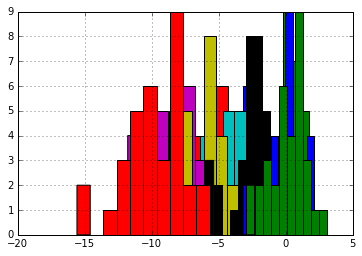

In [85]:
%matplotlib inline
for i in np.arange(10):
    n = int(np.random.randint(0, len(mint), 1))
    mint.iloc[n, np.arange(36)[3:]].hist()

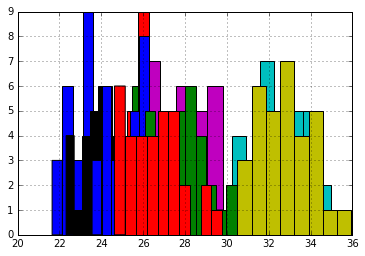

In [93]:
%matplotlib inline
for i in np.arange(10):
    n = int(np.random.randint(0, len(maxt), 1))
    maxt.iloc[n, np.arange(36)[3:]].hist()

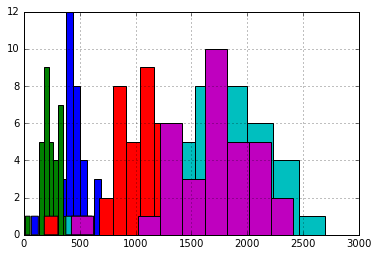

In [95]:
for i in np.arange(5):
    n = int(np.random.randint(0, len(ppt), 1))
    ppt.iloc[n, np.arange(36)[3:]].hist()

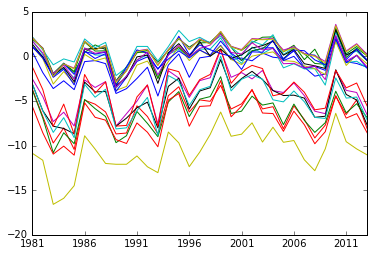

In [56]:
%matplotlib inline
for i in np.arange(20):
    n = int(np.random.randint(0, len(mint), 1))
    mint.iloc[n, np.arange(36)[3:]].plot()

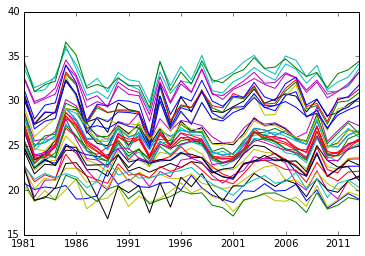

In [58]:
for i in np.arange(40):
    n = int(np.random.randint(0, len(maxt), 1))
    maxt.iloc[n, np.arange(36)[3:]].plot()

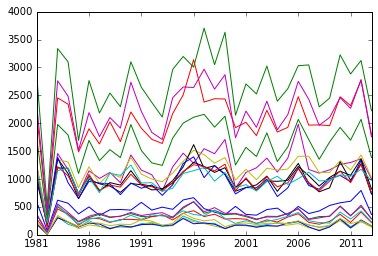

In [60]:
for i in np.arange(20):
    n = int(np.random.randint(0, len(ppt), 1))
    ppt.iloc[n, np.arange(36)[3:]].plot()

In [80]:
def getmean(row, df):
    index = int(row.idx)
    m = df.iloc[index, np.arange(36)[5:]].mean()
    return m
def getstd(row, df):
    index = int(row.idx)
    std = df.iloc[index, np.arange(36)[5:]].std()
    return std
def addMeanStd(ds, var):    
    ds.index = np.arange(len(ds))
    ds['idx'] = np.arange(len(ds))
    m_name = var + 'mean'
    std_name = var + 'std'
    ds[m_name] = ds.apply(getmean, axis = 1, args = (ds,))
    ds[std_name] = ds.apply(getstd, axis = 1, args = (ds,))

#adding the mean values and std for the respective variables
addMeanStd(ppt, 'PPT')
addMeanStd(esals, 'ESAL')
addMeanStd(mint, 'MINT')
addMeanStd(maxt, 'MAXT')

In [86]:
ppt.tail()

,Unnamed: 0,ID,Year,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,PriorMRyr,MajorRyr,PPTmean,idx,PPTstd
8933,294789,72974,1981,356.570007,32.930000,540.400024,331.149994,171.070007,270.140015,280.970001,...,227.259995,482.019989,341.190002,433.429993,241.750000,2000,2007,300.629998,8933,88.723357
8934,294822,72985,1981,356.570007,32.930000,540.400024,331.149994,171.070007,270.140015,280.970001,...,227.259995,482.019989,341.190002,433.429993,241.750000,2000,2007,300.629998,8934,88.723357
8935,294855,72986,1981,340.579987,27.889999,526.179993,319.890015,160.550003,254.630005,263.890015,...,205.619995,465.089996,323.170013,408.750000,232.750000,2000,2007,284.210970,8935,86.358257
8936,294888,72987,1981,340.579987,27.889999,526.179993,319.890015,160.550003,254.630005,263.890015,...,205.619995,465.089996,323.170013,408.750000,232.750000,2000,2007,284.210970,8936,86.358257
8937,294921,73016,1981,336.700012,27.059999,523.280029,315.429993,156.889999,250.399994,260.089996,...,203.330002,460.510010,318.809998,405.170013,231.850006,2000,2007,281.519357,8937,86.083008


In [87]:
esals.tail()

,Unnamed: 0,ID,Year,1981,1982,1983,1984,1985,1986,1987,...,2009,2010,2011,2012,2013,PriorMRyr,MajorRyr,idx,ESALmean,ESALstd
8933,316140,72974,1981,6204.869567,6279.471668,6595.896036,6548.142809,6566.834850,7074.643273,7478.063683,...,10031.192585,10171.393839,10022.538447,9933.298663,9156,2000,2007,8933,9347.130853,1397.341646
8934,316173,72985,1981,6925.924746,7009.196205,7362.391600,7309.089068,7329.953273,7896.773072,8347.074142,...,11196.896922,11353.390677,11187.237104,11087.626948,10220,2000,2007,8934,10433.341778,1559.723856
8935,316206,72986,1981,7987.177011,8083.208069,8490.523229,8429.053205,8453.114410,9106.787419,9626.087655,...,12912.585824,13093.058955,12901.445842,12786.572526,11786,2000,2007,8935,12032.031917,1798.718724
8936,316239,72987,1981,9844.707317,9963.071748,10465.113774,10389.348033,10419.005009,11224.698866,11864.769673,...,15915.589196,16138.033891,15901.858455,15760.269734,14527,2000,2007,8936,14830.250098,2217.036052
8937,316272,73016,1981,13383.570235,13544.482959,14226.993318,14123.992173,14164.309901,15259.625381,16129.781529,...,21636.743376,21939.149949,21618.076866,21425.591448,19749,2000,2007,8937,20161.258979,3013.990844


In [90]:
merged_weather = pd.concat([esals[['ID', 'ESALmean', 'ESALstd']], ppt[['PPTmean', 'PPTstd']], mint[['MINTmean', 'MINTstd']],
                           maxt[['MAXTmean', 'MAXTstd']]], axis = 1)

In [91]:
merged_weather.head()

,ID,ESALmean,ESALstd,PPTmean,PPTstd,MINTmean,MINTstd,MAXTmean,MAXTstd
0,1,23496.869612,4884.604865,964.209355,154.203705,0.188065,1.393931,24.471613,1.182844
1,24,136028.254537,28277.991273,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242
2,27,83571.872262,17373.189728,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242
3,28,83571.872262,17373.189728,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242
4,32,91051.346892,18928.046982,1025.094193,159.552571,-0.035161,1.405529,24.216452,1.142242


In [92]:
merged_weather.to_csv('../modelDatasets/weather_vars_stats.csv')